In [ ]:
# EDA conjunto de datos proporcionado del Desa􀄰o de Datos PHME 2022
# Armando Arturo Custodio Díaz
# 20196355
# a.custodio@pucp.edu.pe

# Importando librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.fft import fft, ifft

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Conectando google drive con google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Visión General de los Datos (5 puntos):

Cargar e inspeccionar el conjunto de datos.



In [ ]:
# Cargar la data
path='/content/drive/MyDrive/TemasH/Lab02/'

PHME_data_train=pd.read_csv(path+'SPI_testing_0.csv')

PHME_data_train.head()

,PanelID,FigureID,Date,Time,ComponentID,PinNumber,PadID,PadType,Volume(%),Height(um),...,OffsetX(%),OffsetY(%),SizeX,SizeY,Volume(um3),Area(um2),Shape(um),PosX(mm),PosY(mm),Result
0,26319045000520102844,1.0,9/20/2019,11:17:58,BC1,1,1.0,0.0,70.585,104.560,...,0.030,-0.328,5.1,5.1,2.753875e+09,26337780.0,0.0,55.6,23.6,GOOD
1,26319045000520102844,1.0,9/20/2019,11:17:58,BC1,2,2.0,0.0,67.545,103.364,...,1.122,0.902,5.1,5.1,2.635256e+09,25494920.0,0.0,48.5,23.6,GOOD
2,26319045000520102844,1.0,9/20/2019,11:17:58,BC2,1,3.0,0.0,62.871,96.632,...,0.617,0.393,5.1,5.1,2.452924e+09,25384120.0,0.0,13.4,23.6,GOOD
3,26319045000520102844,1.0,9/20/2019,11:17:58,BC2,2,4.0,0.0,71.368,106.551,...,0.589,0.042,5.1,5.1,2.784422e+09,26132310.0,0.0,20.5,23.6,GOOD
4,26319045000520102844,1.0,9/20/2019,11:17:58,BC3,1,5.0,0.0,69.718,104.010,...,-0.191,-0.284,5.1,5.1,2.720028e+09,26151660.0,0.0,55.6,45.6,GOOD


Identificar las dimensiones del conjunto (número de filas y columnas).

In [ ]:
# •	Identificar las dimensiones del conjunto (número de filas y columnas).
PHME_data_train.shape

(1293036, 21)

Identificar los tipos de datos (integer, object, float, etc).

In [ ]:
PHME_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293036 entries, 0 to 1293035
Data columns (total 21 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   PanelID      1293036 non-null  object 
 1   FigureID     1293036 non-null  float64
 2   Date         1293036 non-null  object 
 3   Time         1293036 non-null  object 
 4   ComponentID  1293036 non-null  object 
 5   PinNumber    1293036 non-null  object 
 6   PadID        1293036 non-null  float64
 7   PadType      1293036 non-null  float64
 8   Volume(%)    1293036 non-null  float64
 9   Height(um)   1293036 non-null  float64
 10  Area(%)      1293036 non-null  float64
 11  OffsetX(%)   1293036 non-null  float64
 12  OffsetY(%)   1293036 non-null  float64
 13  SizeX        1293036 non-null  float64
 14  SizeY        1293036 non-null  float64
 15  Volume(um3)  1293036 non-null  float64
 16  Area(um2)    1293036 non-null  float64
 17  Shape(um)    1293036 non-null  float64
 18  Po

Determinar los tipos de variables (categóricas, continuas, etc.)

Variables Categoricas

*   Variables Nominales: ComponentID, PanelID, FigureID, PinNumber, PadID, PadType, FigureID, Result
*   Variables Ordinales:

Variables Numericas

*   Variables Continuas: Volume(%), Height(um), Area(%), OffsetX(%),      OffsetY(%), SizeX, SizeY, Volume(um3), Area(um2), Shape(um), PosX(mm), PosY(mm)
*   Variables Discretas:  

Variables de Tiempo:  Date, Time

Establecer el identificador único de la data.

In [ ]:
# PHME_data_train.groupby('PanelID').nunique().reset_index().shape[0]

if PHME_data_train.groupby(['PanelID','FigureID','ComponentID','PinNumber']).nunique().reset_index().shape[0] == PHME_data_train.shape[0]:
  print('identificador unico encontrado!')
else:
  print('no se encontro')

# Esto se ha obtenido dada la información en la pagina:
#   "In this scenario, the SPI data, reports, for each PCB, characteristics such as Identifiers: PanelID, FigureID, ComponentID, PinNumber"

identificador unico encontrado!


#Limpieza de Datos (3 puntos):

Identificar y tratar cualquier anomalía o valor atipico en las variables 'Volume(%)' y 'Area(%)'.

In [ ]:
# VOLUME
# AREA

# En este caso, escojo usar la regla de 99.7%, pues al usar la regla del 95%, se forman picos en los DensityPlot

def sigma_rule(df):

    rule = (100-99.7)/2

    data = PHME_data_train[df].copy()

    # Calculating bounds for 2-sigma rule (approximately 2.5th and 97.5th percentiles)
    lower_bound = np.percentile(data, rule)
    upper_bound = np.percentile(data, 100-rule)

    # Identifying outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Replacing outliers with NaN values
    PHME_data_train.loc[outliers.index, df] = np.nan

sigma_rule('Volume(%)')
sigma_rule('Area(%)')

# TERCERA VARIABLE NUMÉRICA CONTINUA: Height(um)
sigma_rule('Height(um)')

Verificar la existencia de valores faltantes y manejarlos adecuadamente.

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(PHME_data_train)

Your selected dataframe has 21 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Volume(%),3880,0.3
Area(%),3880,0.3
Height(um),3878,0.3


In [ ]:
# Llenando los valores nulos de variables categoricas con mean
PHME_data_train['Volume(%)']=PHME_data_train['Volume(%)'].fillna(PHME_data_train['Volume(%)'].mean())
PHME_data_train['Area(%)']=PHME_data_train['Area(%)'].fillna(PHME_data_train['Area(%)'].mean())
PHME_data_train['Height(um)']=PHME_data_train['Height(um)'].fillna(PHME_data_train['Height(um)'].mean())

missing_values_table(PHME_data_train)

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#Análisis Estadístico (2 puntos):

Calcular y mostrar en una tabla las estadísticas resumidas (media, mínimo, máximo, desviación estándar, etc.).

In [ ]:
# Calcular y mostrar en una tabla las estadísticas resumidas (media, mínimo, máximo, desviación estándar, etc.).
PHME_data_train.describe()

,FigureID,PadID,PadType,Volume(%),Height(um),Area(%),OffsetX(%),OffsetY(%),SizeX,SizeY,Volume(um3),Area(um2),Shape(um),PosX(mm),PosY(mm)
count,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06,1.293036e+06
mean,4.497593e+00,1.578755e+03,4.550129e+00,9.243289e+01,1.122620e+02,9.915542e+01,8.145681e-01,-5.030055e-01,8.717018e-01,7.721080e-01,1.139665e+08,1.073379e+06,4.558572e+01,1.217326e+02,7.219978e+01
std,2.291287e+00,9.123004e+02,4.979722e+00,1.083471e+01,9.101864e+00,7.291731e+00,2.670331e+00,5.236029e+00,8.159782e-01,7.505734e-01,3.783887e+08,3.676570e+06,1.465559e+01,6.602795e+01,3.516829e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,5.819400e+01,8.368200e+01,7.931400e+01,-2.924500e+01,-3.263600e+01,2.200000e-01,2.200000e-01,2.079761e+06,2.975600e+04,0.000000e+00,9.100000e+00,1.180000e+01
25%,2.000000e+00,7.900000e+02,0.000000e+00,8.557800e+01,1.061960e+02,9.410000e+01,-5.050000e-01,-3.274000e+00,5.000000e-01,5.000000e-01,2.457405e+07,2.205100e+05,3.650000e+01,6.582500e+01,4.220000e+01
50%,4.000000e+00,1.579000e+03,0.000000e+00,9.212400e+01,1.123010e+02,9.935100e+01,5.470000e-01,-4.270000e-01,5.000000e-01,5.000000e-01,2.763846e+07,2.384750e+05,4.460000e+01,1.226000e+02,6.070000e+01
75%,6.000000e+00,2.370000e+03,1.000000e+01,9.885200e+01,1.183310e+02,1.037510e+02,1.947000e+00,2.332000e+00,1.070000e+00,8.890000e-01,6.663465e+07,6.475710e+05,5.380000e+01,1.793000e+02,1.073000e+02
max,8.000000e+00,3.160000e+03,1.000000e+01,1.398020e+02,1.427900e+02,1.323710e+02,2.066000e+01,3.980300e+01,5.100000e+00,5.100000e+00,6.629675e+09,2.679886e+07,3.484000e+02,2.361000e+02,1.258000e+02


#Visualización de Datos (6 puntos):

Crear tres gráficos de barras de frecuencias relativas para tres variables categóricas y tres gráficos de densidad para tres variables numéricas continuas. Seis gráficos en total. Comentar cada gráfico.

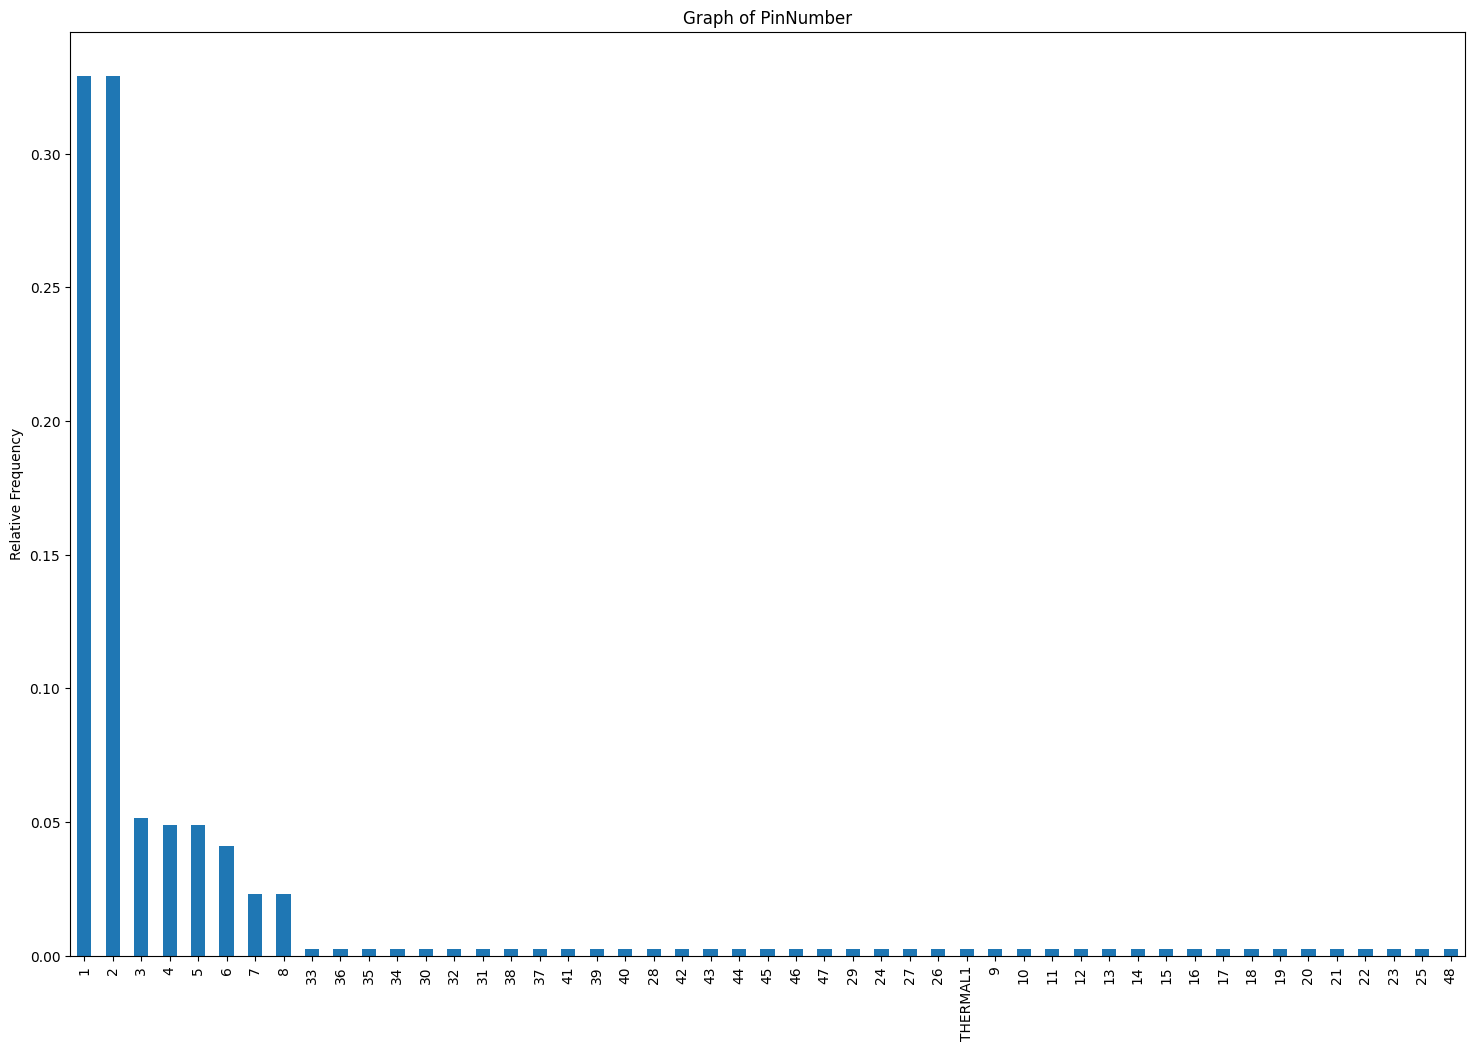

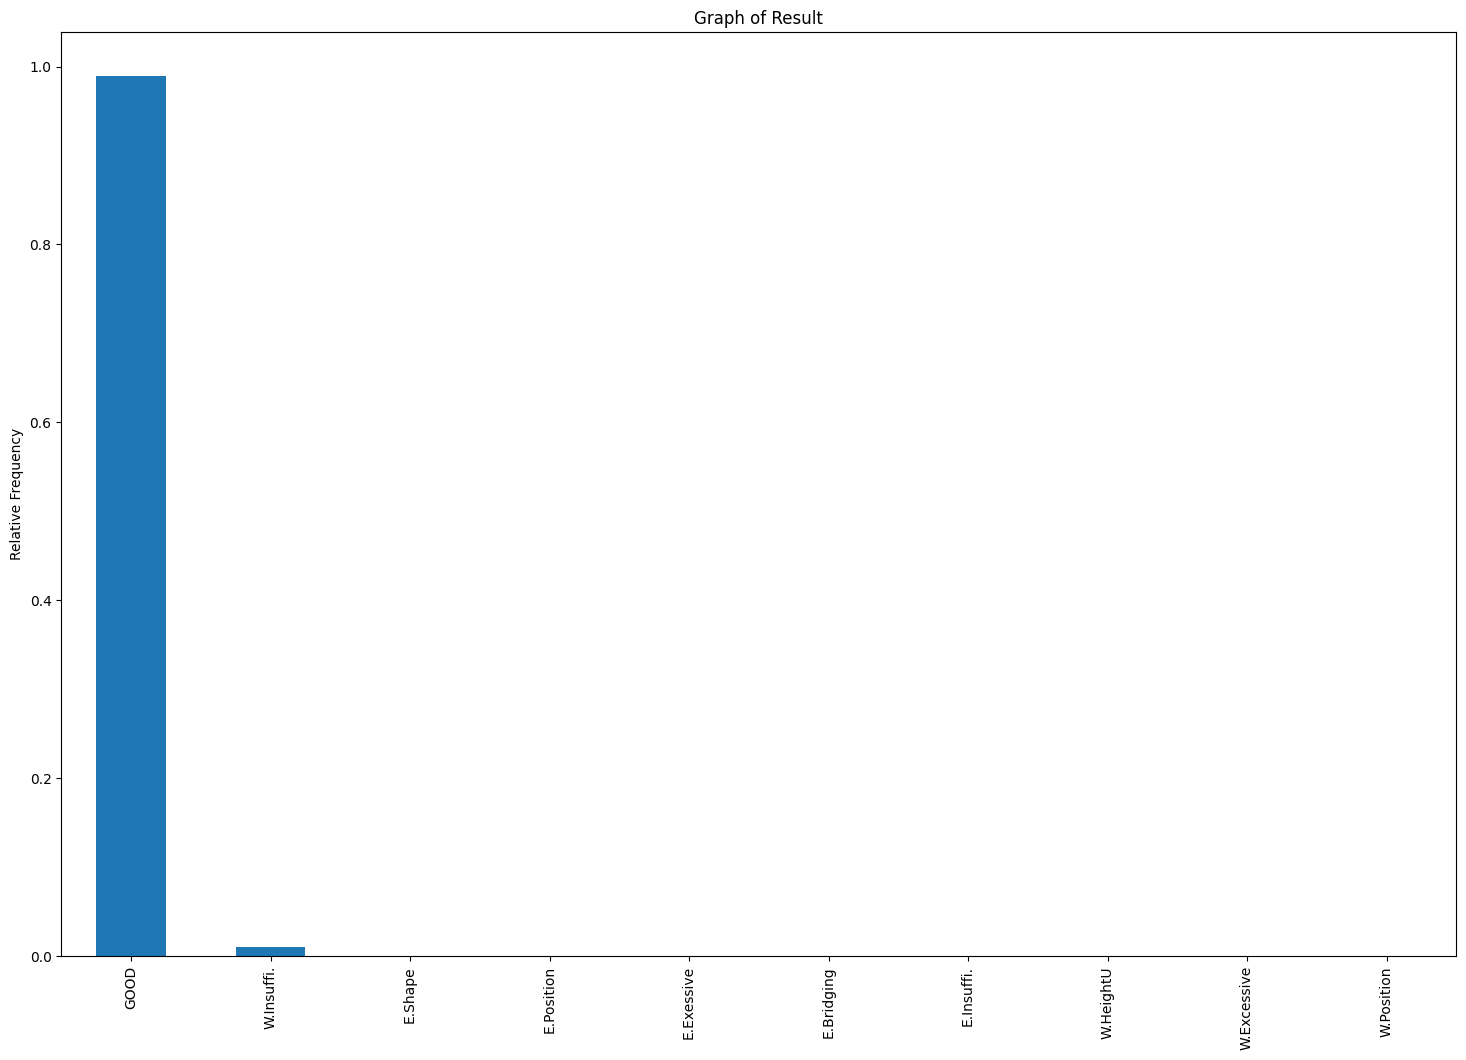

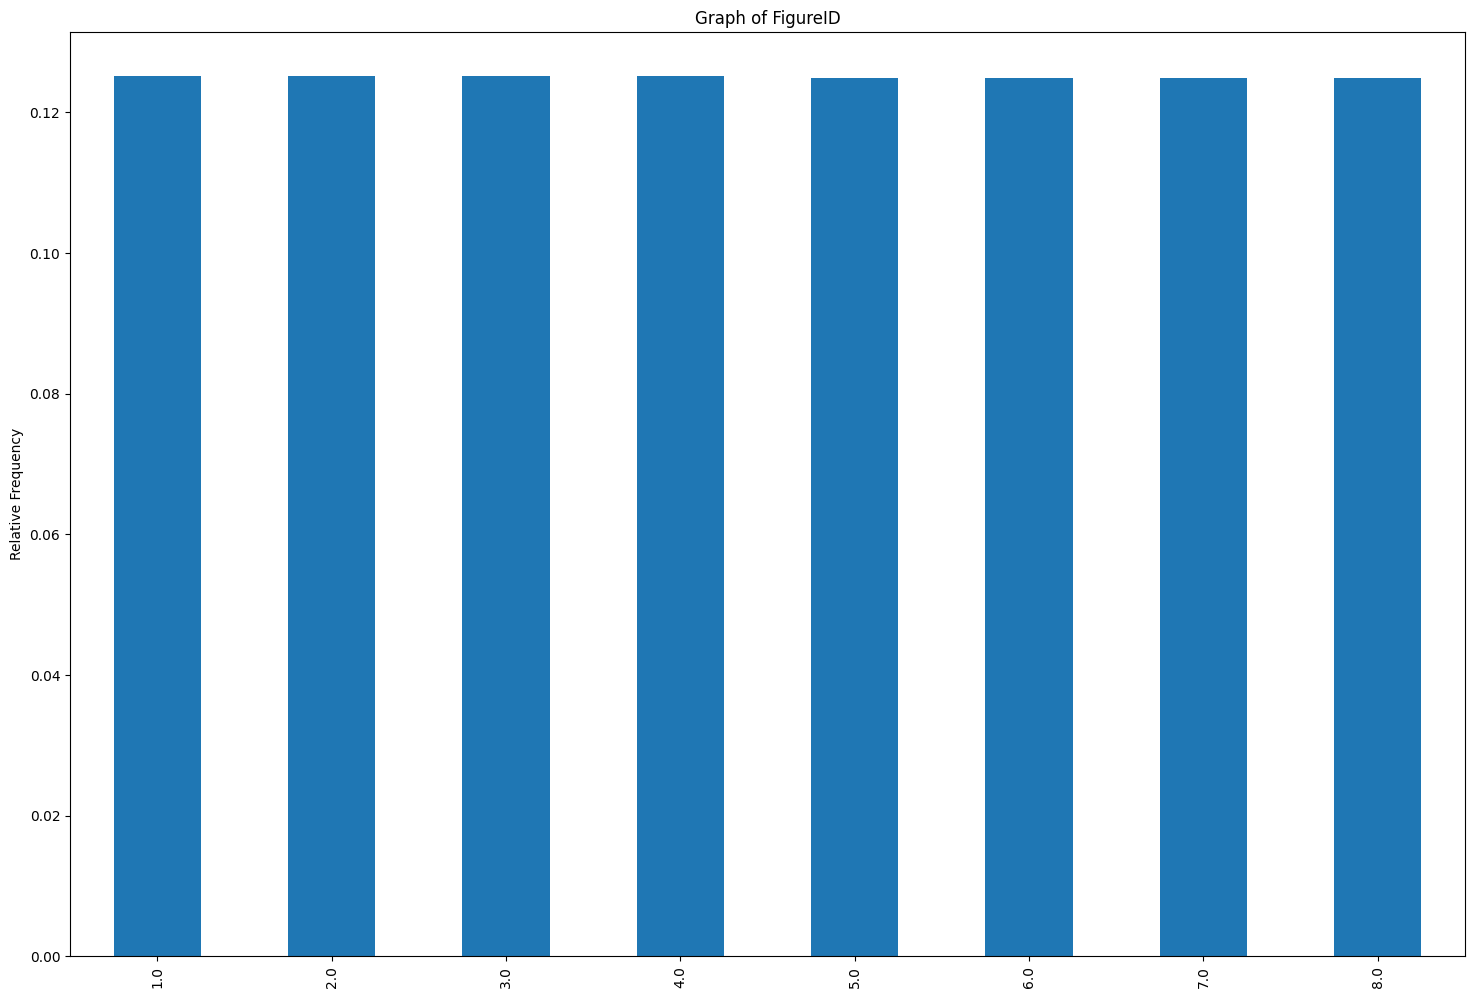

In [ ]:
# Variables nominales

# Calculate relative frequencies

def relative_plot(df):
  relative_freq = PHME_data_train[df].value_counts(normalize=True)

  # Plot
  plt.figure(figsize=(18, 12))
  relative_freq.plot(kind='bar')
  plt.ylabel('Relative Frequency')
  plt.title('Graph of ' + df)
  plt.xticks(rotation=90)

  plt.show()

relative_plot('PinNumber')
relative_plot('Result')
relative_plot('FigureID')

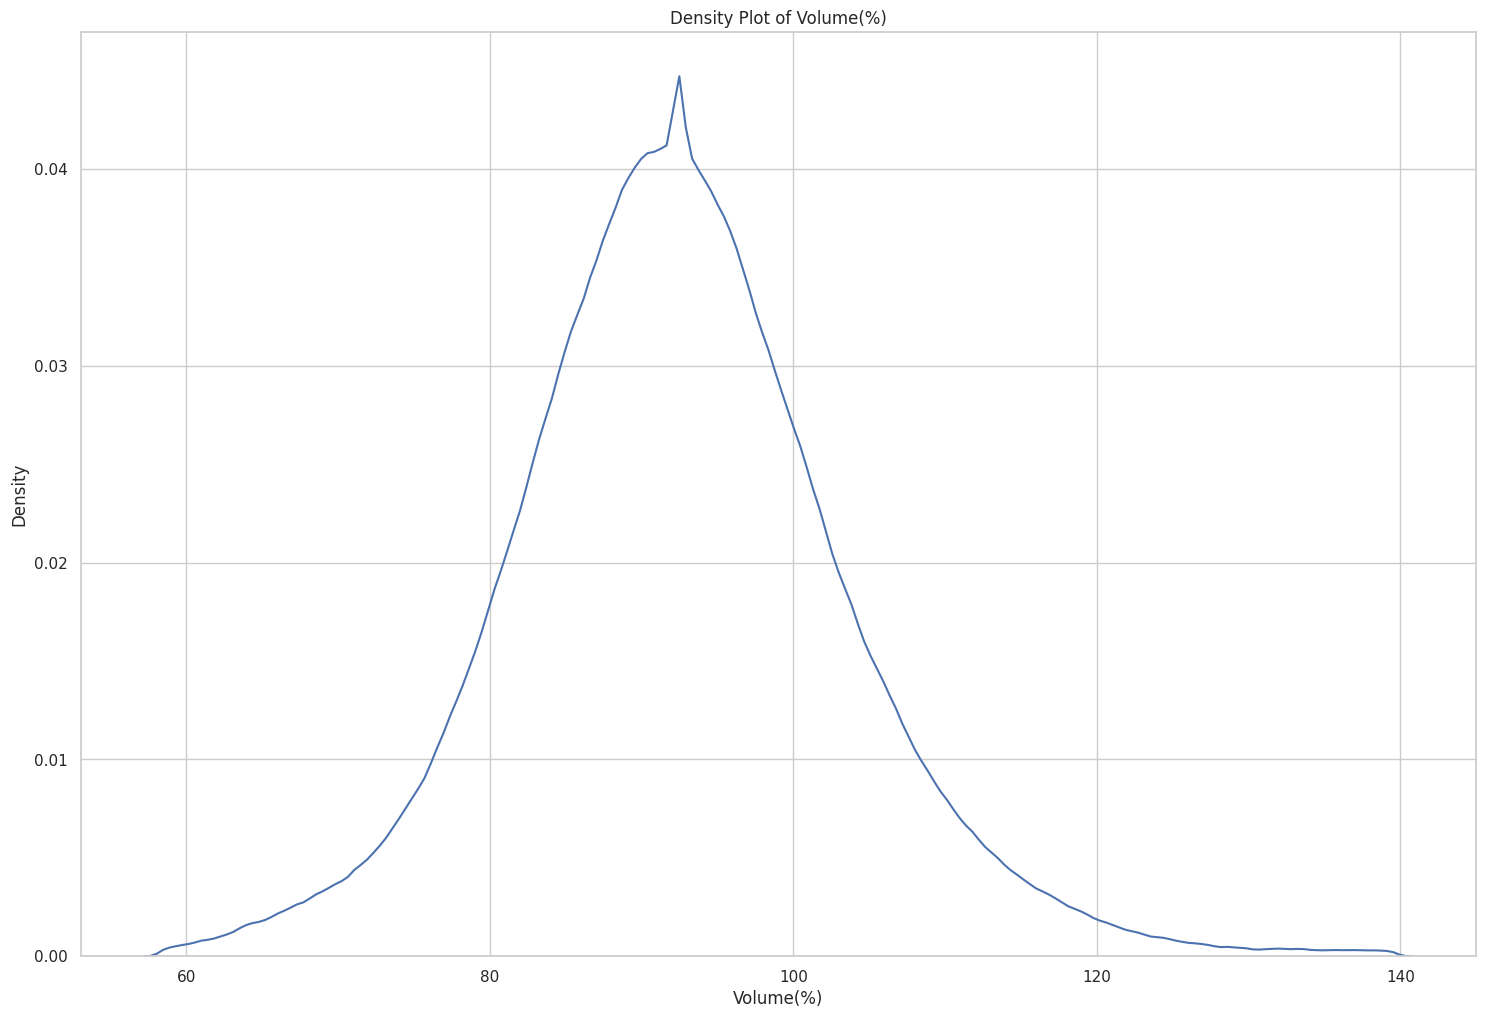

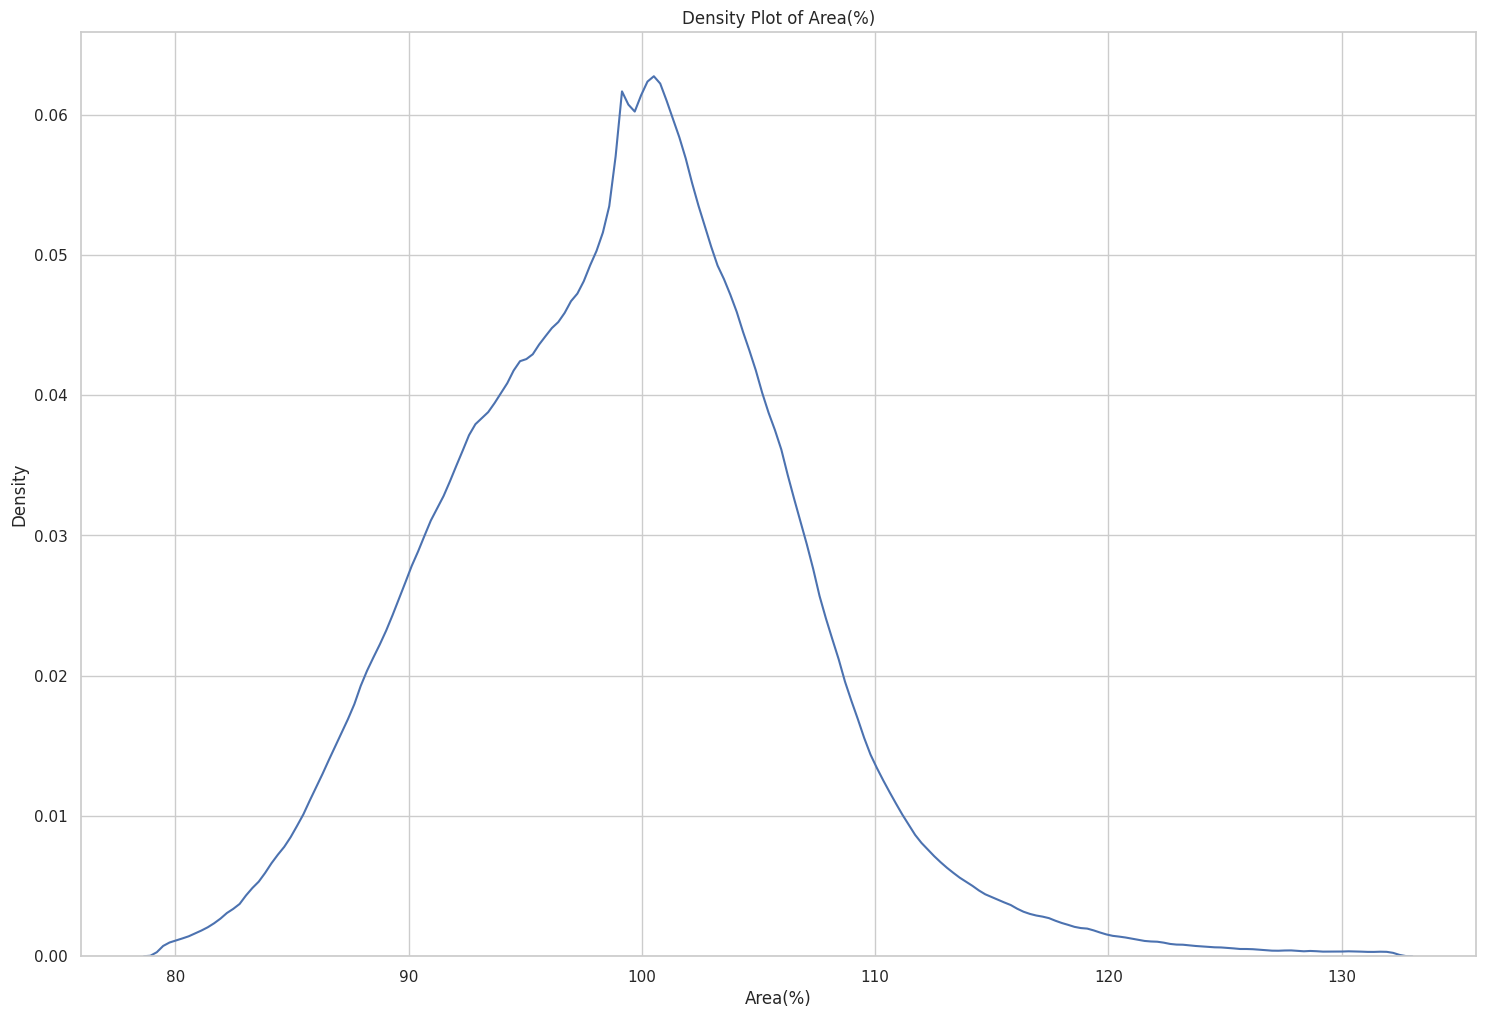

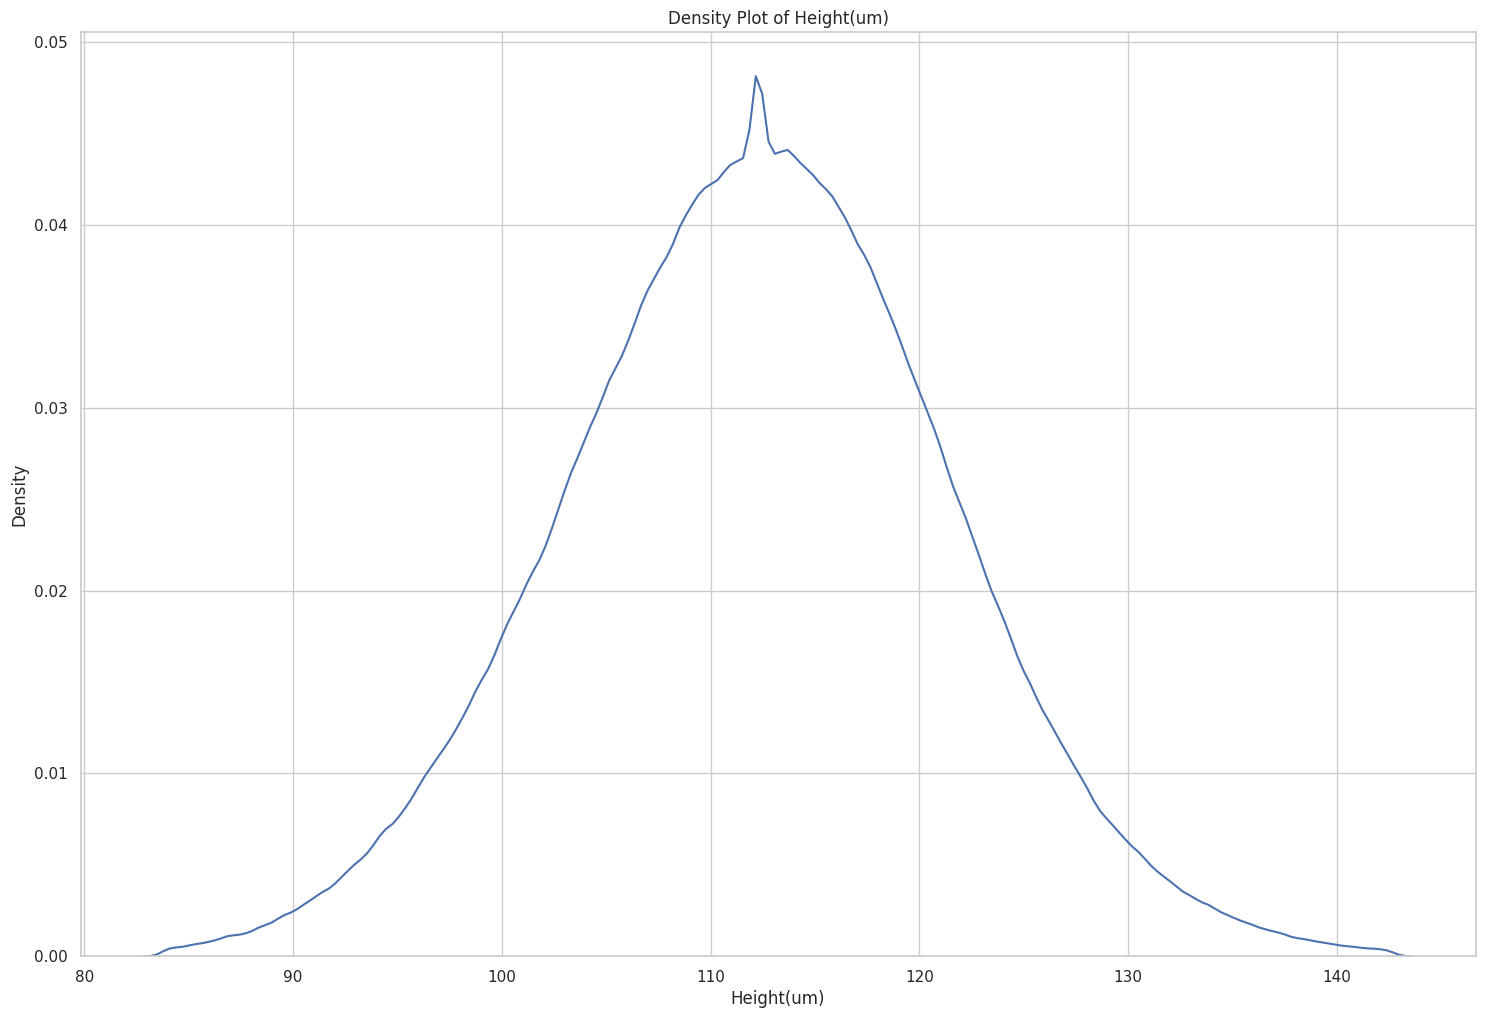

In [ ]:
# Variables numéricas continuas

# Creating the density plot
def density_plot(df):

  sns.set(style="whitegrid")
  plt.figure(figsize=(18, 12))

  # Use df instead of hardcoding the column name 'Age'
  sns.kdeplot(PHME_data_train[df], bw_adjust=0.5)

  plt.title('Density Plot of ' + df)
  plt.xlabel(df)
  plt.ylabel('Density')
  plt.show()

density_plot('Volume(%)')
density_plot('Area(%)')
density_plot('Height(um)')

Crear un ‘Correlation Heat Map’ para examinar las correlaciones entre las variables y comentar los hallazgos.

<ipython-input-13-457f7089f1f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = PHME_data_train.corr()


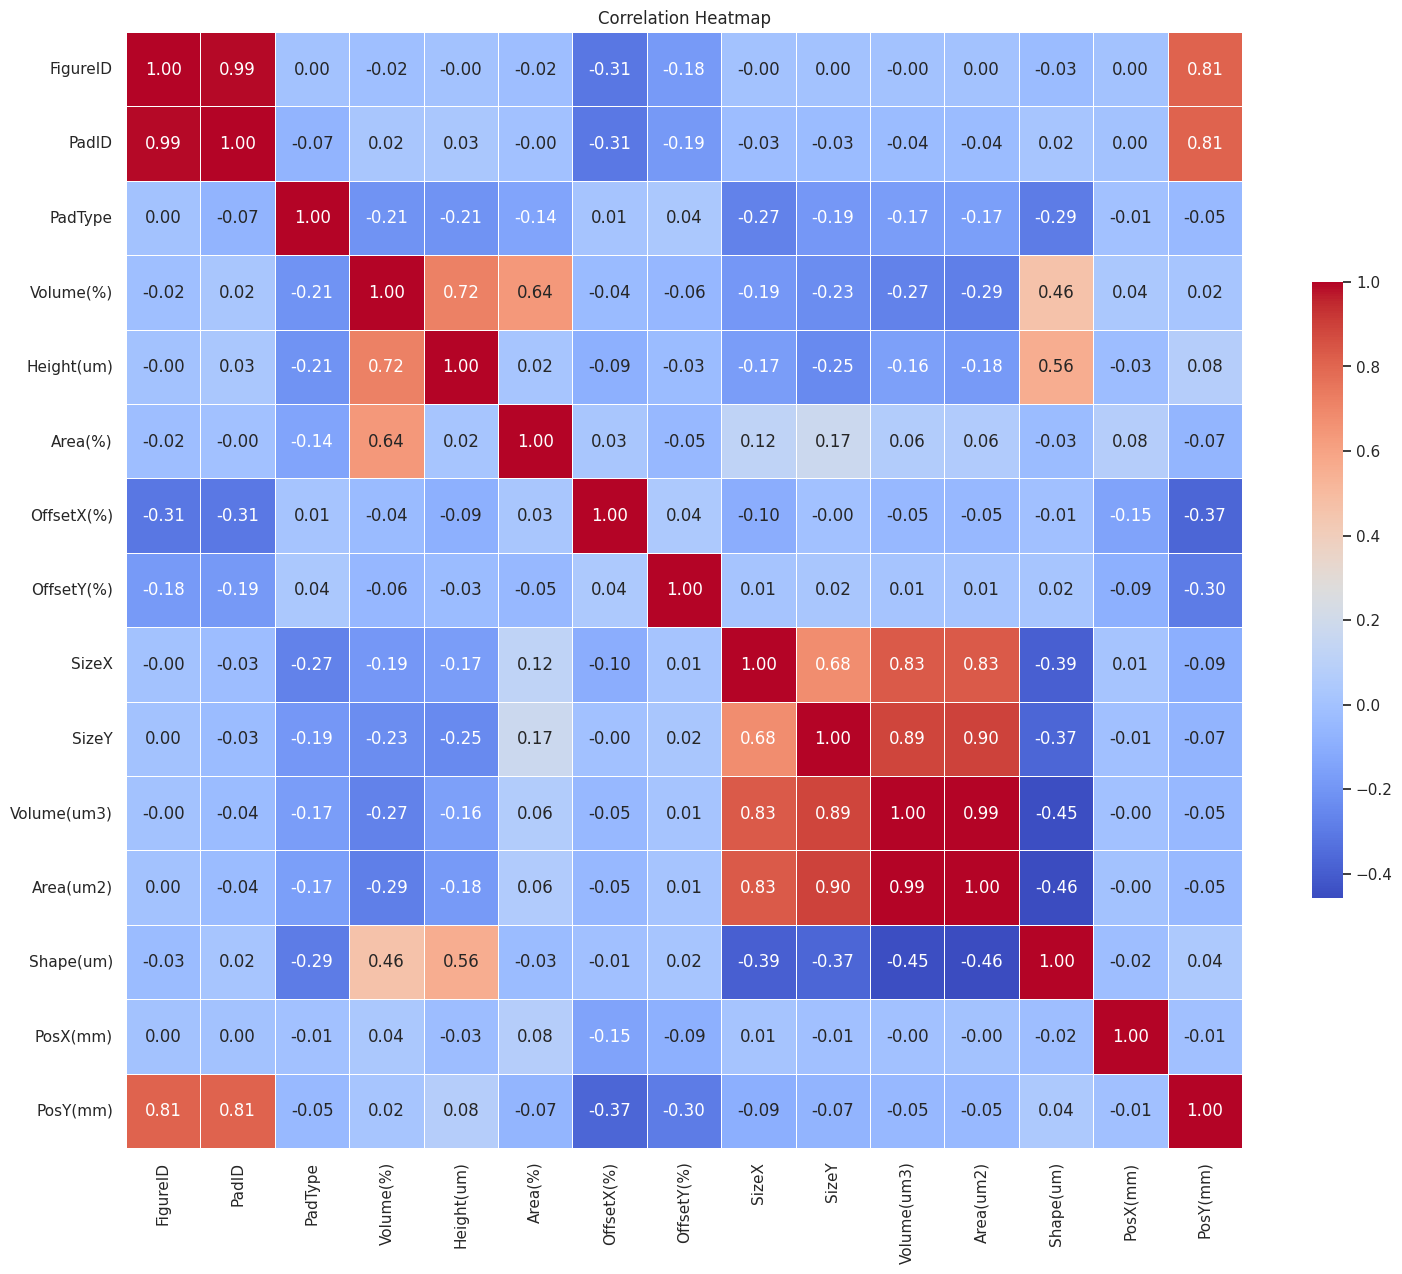

In [ ]:
corr_matrix = PHME_data_train.corr()

# Creando la grafica
plt.figure(figsize=(18, 16))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap')
plt.show()